In [5]:
import numpy as np
import pandas as pd
import glob
import os

filename = "illustris_morph_rf.txt"
pathname = r"C:\Users\stefa\OneDrive\Documentos\Natali 2\illustris_morphs_rf.txt"
filename2 = pathname+"\\"+filename

# importing Illustris catalog
catalog_new = []
catalog_new = np.genfromtxt('illustris_morphs_rf.txt', dtype=None)
catalog = pd.DataFrame(catalog_new)
catalog.columns =  ['snap','subid','logmstar','cam','merger','rfprob','asym_I','cc_I','g_I','m20_I','mprime_I','asym_H','cc_H','g_H','m20_H','mprime_H','t_lastmaj','t_lastmin','t_nextmaj','t_nextmin']

C:\Users\stefa\AppData\Local\Temp\ipykernel_12732\1577780740.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  catalog_new = np.genfromtxt('illustris_morphs_rf.txt', dtype=None)


In [6]:
# extract only objects from snapshot 68 (which is for z=2)
merged_68 = catalog.loc[catalog['snap'] == 68]
merged_68

,snap,subid,logmstar,cam,merger,rfprob,asym_I,cc_I,g_I,m20_I,mprime_I,asym_H,cc_H,g_H,m20_H,mprime_H,t_lastmaj,t_lastmin,t_nextmaj,t_nextmin
52329,68,0,11.88,0,True,b'None',NaN,NaN,NaN,NaN,NaN,0.0860,2.8530,0.5463,-1.8116,-1.3221,-0.4537,-0.4537,0.1655,3.4351
52330,68,0,11.88,1,True,b'None',NaN,NaN,NaN,NaN,NaN,0.0738,2.8770,0.5526,-1.7441,-1.3423,-0.4537,-0.4537,0.1655,3.4351
52331,68,0,11.88,3,True,b'None',NaN,NaN,NaN,NaN,NaN,0.0911,2.8247,0.5340,-1.7679,-1.3116,-0.4537,-0.4537,0.1655,3.4351
52332,68,0,11.88,2,True,b'None',NaN,NaN,NaN,NaN,NaN,0.0769,2.7880,0.5358,-1.7708,-1.3380,-0.4537,-0.4537,0.1655,3.4351
52333,68,14557,11.63,0,False,b'0.221',0.1312,3.4661,0.4992,-1.9007,-0.8344,0.0462,3.7150,0.5528,-2.0840,-1.5967,-1.9574,-1.3663,50.0000,3.4351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61254,68,114316,9.83,0,False,b'None',-0.1116,2.0279,0.4731,-0.9225,-0.3593,-0.1375,2.3497,0.4938,-1.3445,0.1868,-2.0436,-50.0000,0.6268,50.0000
61255,68,122676,9.81,3,False,b'None',-0.1379,NaN,NaN,NaN,NaN,-0.1232,NaN,NaN,NaN,NaN,-1.3663,-50.0000,0.6268,50.0000
61256,68,122676,9.81,1,False,b'None',-0.1723,NaN,NaN,NaN,NaN,-0.2282,NaN,NaN,NaN,NaN,-1.3663,-50.0000,0.6268,50.0000
61257,68,122676,9.81,2,False,b'None',0.0405,NaN,NaN,NaN,NaN,-0.2032,NaN,NaN,NaN,NaN,-1.3663,-50.0000,0.6268,50.0000


In [12]:
# producting an array with objects used in RF + all object with p_RF=None which were excluded in RF
temp = np.array(merged_68.copy(), dtype=None)
rf_objects = []
for i in range(len(temp)):
    rf_objects.append([temp[i,1],temp[i,4]])
rf_objects = np.stack(rf_objects)
print(rf_objects[:10])

#Retiar repetições
#object IDs, which are needed to find these objects in the image files
subid, indices = np.unique(rf_objects[:,0], return_index=True)
RF_labels = rf_objects[indices]
print(RF_labels[:10])

import numpy as np
RF_labels = rf_objects[indices]

# Check the shape of the array
print("Shape:", RF_labels.shape)

# Check the data type of the array
print("Data Type:", RF_labels.dtype)

# Example for a 2D array
if len(RF_labels.shape) == 2:
    print("Number of rows:", RF_labels.shape[0])
    print("Number of columns:", RF_labels.shape[1])

[[    0     1]
 [    0     1]
 [    0     1]
 [    0     1]
 [14557     0]
 [14557     0]
 [14557     0]
 [14557     0]
 [ 8570     0]
 [ 8570     0]]
[[   0    1]
 [   1    0]
 [   2    0]
 [   3    1]
 [   4    0]
 [   6    0]
 [   7    0]
 [  12    0]
 [1350    0]
 [1351    0]]
Shape: (2233, 2)
Data Type: int32
Number of rows: 2233
Number of columns: 2


In [13]:
shid_array = RF_labels[:,0]
merger_labels = RF_labels[:,1]

In [16]:
len(merger_labels)

2233

In [22]:
from astropy.io import fits

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Imprimir todas as chaves e seus valores
for key in header.keys():
    print(f"{key}: {header[key]}")

# Fechar o arquivo FITS
hdulist.close()

SIMPLE: True
BITPIX: -64
NAXIS: 4
NAXIS1: 75
NAXIS2: 75
NAXIS3: 2
NAXIS4: 15426
EXTEND: True
NAME1: ImageX
NAME2: ImageY
NAME3: filter
NAME4: object
EXTNAME: Images
BUNIT: microjanskies/arcsec^2
PIXSIZE: 0.1875
DOI: 10.17909/t9-vqk6-pc80
HLSPID: DEEPMERGE
HLSPLEAD: Aleksandra Ciprijanovic
HLSPNAME: Mock Image Training Sets for DeepMerge
SIMULATD: True
HLSPTARG: Illustris Simulation
HLSPVER: v1
INSTRUME: ACS,WFC3,NIRCam
LICENSE: CC BY 4.0
LICENURL: https://creativecommons.org/licenses/by/4.0/
OBSERVAT: HST,JWST
TELESCOP: HST,JWST
PROPOSID: HST AR#13887
REFERENC: 2021MNRAS.506..677C


In [23]:
from astropy.io import fits

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[1].header

# Imprimir todas as chaves e seus valores
for key in header.keys():
    print(f"{key}: {header[key]}")

# Fechar o arquivo FITS
hdulist.close()

XTENSION: BINTABLE
BITPIX: 8
NAXIS: 2
NAXIS1: 8
NAXIS2: 15426
PCOUNT: 0
GCOUNT: 1
TFIELDS: 1
TTYPE1: MergerLabel
TFORM1: D
EXTNAME: MergerLabel


In [24]:
from astropy.io import fits

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header_hdu0 = hdulist[0].header

# Acessar o cabeçalho do segundo HDU (hdu[1])
header_hdu1 = hdulist[1].header

# Obter a forma dos dados do HDU 0
shape_hdu0 = hdulist[0].data.shape

# Obter a forma dos dados do HDU 1
shape_hdu1 = hdulist[1].data.shape

# Imprimir as informações
print(f"Shape dos dados do HDU 0: {shape_hdu0}")
print("\nCabeçalho do HDU 1:")
print(header_hdu1)
print(f"\nShape dos dados do HDU 1: {shape_hdu1}")

# Fechar o arquivo FITS
hdulist.close()

Shape dos dados do HDU 0: (15426, 2, 75, 75)

Cabeçalho do HDU 1:
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                    8 / length of dimension 1                          NAXIS2  =                15426 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    1 / number of table fields                         TTYPE1  = 'MergerLabel'                                                         TFORM1  = 'D       '                                                            EXTNAME = 'MergerLabel'                                                         END                                                   

In [25]:
from astropy.io import fits
import numpy as np

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o segundo HDU (hdu[1])
hdu1_data = hdulist[1].data
z=hdu1_data.shape[0]

# Visualizar os primeiros 10 dados
print(hdu1_data) 
print(z)

# Fechar o arquivo FITS
hdulist.close()

[(1.,) (1.,) (1.,) ... (0.,) (0.,) (0.,)]
15426


[  540  2926  2213  8162  2563   582 12000  4689  4102  2266 12204  2793
 11893  5478  3212 13888]


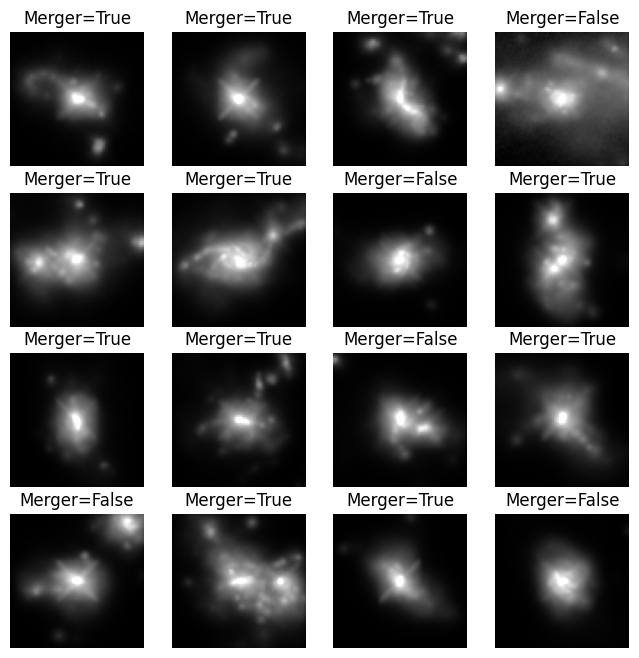

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
#np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

#F814W, F160W
# Pegar as imagens F160W (índice=1) do conjunto de dados simulado para as seleções
examples = [hdulist[0].data[j, 1, :, :] for j in example_ids]

# Inicializar a figura
fig = plt.figure(figsize=(8, 8))

# Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
for i, image in enumerate(examples):
    ax = fig.add_subplot(4, 4, i + 1)
    norm = simple_norm(image, 'log', max_percent=99.75)

    ax.imshow(image, aspect='equal', cmap='binary_r', norm=norm)
    ax.set_title('Merger='+str(bool(hdulist[1].data[example_ids[i]][0])))

    ax.axis('off')

plt.show()

hdulist.close()

[11768 12411  5249 11386  2207 11194 15333 14712  7349  1472  7219  7363
  1367  3884  4996  3803]


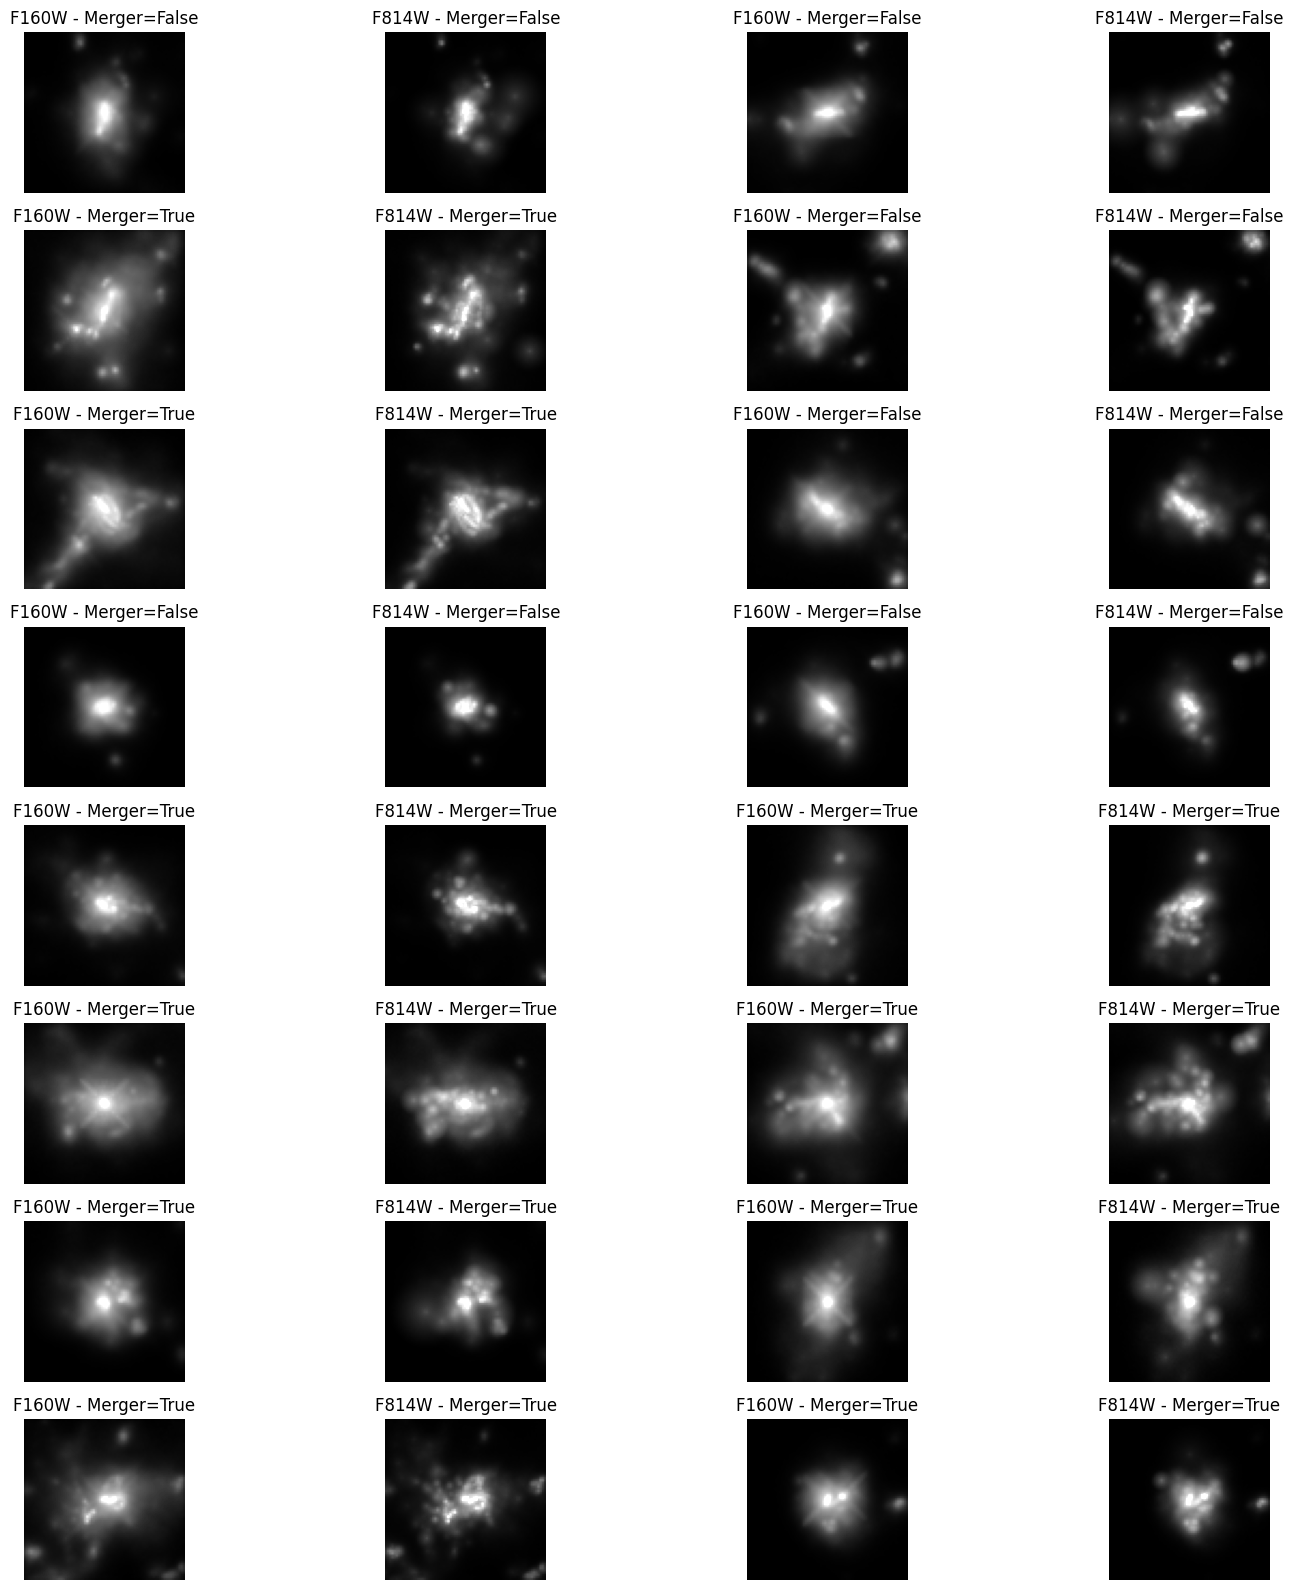

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
# np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]

# Inicializar a figura
fig = plt.figure(figsize=(16, 16))  # Ajuste a altura para separar as imagens

# Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
for i, (image_f160w, image_f814w) in enumerate(zip(examples_f160w, examples_f814w)):
    # F160W
    ax1 = fig.add_subplot(8, 4, i * 2 + 1)  # Ajuste o layout para 8 linhas e 4 colunas
    norm1 = simple_norm(image_f160w, 'log', max_percent=99.75)
    ax1.imshow(image_f160w, aspect='equal', cmap='binary_r', norm=norm1)
    ax1.set_title('F160W - Merger=' + str(bool(hdulist[1].data[example_ids[i]][0])))
    ax1.axis('off')

    # F814W
    ax2 = fig.add_subplot(8, 4, i * 2 + 2)  # Ajuste o layout para 8 linhas e 4 colunas
    norm2 = simple_norm(image_f814w, 'log', max_percent=99.75)
    ax2.imshow(image_f814w, aspect='equal', cmap='binary_r', norm=norm2)
    ax2.set_title('F814W - Merger=' + str(bool(hdulist[1].data[example_ids[i]][0])))
    ax2.axis('off')

plt.tight_layout()  # Ajuste o layout para evitar sobreposição dos títulos
plt.show()

hdulist.close()

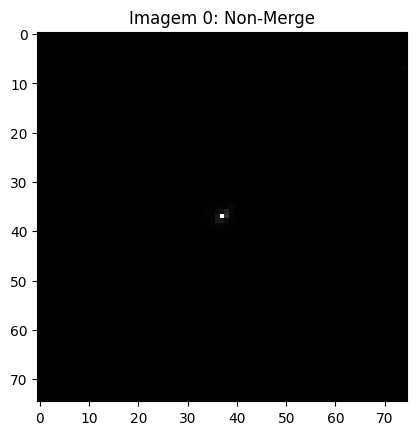

Shape da imagem 0: (75, 75)


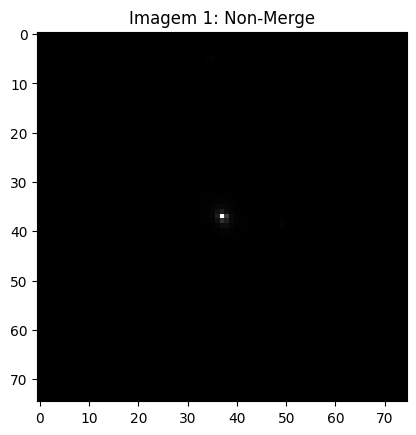

Shape da imagem 1: (75, 75)


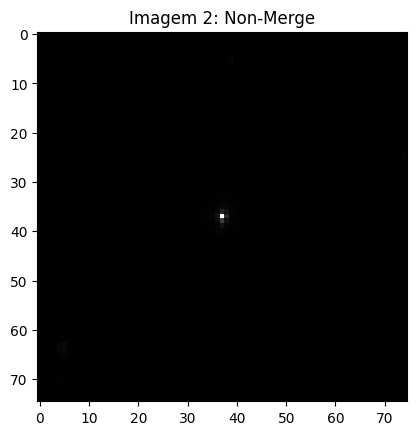

Shape da imagem 2: (75, 75)


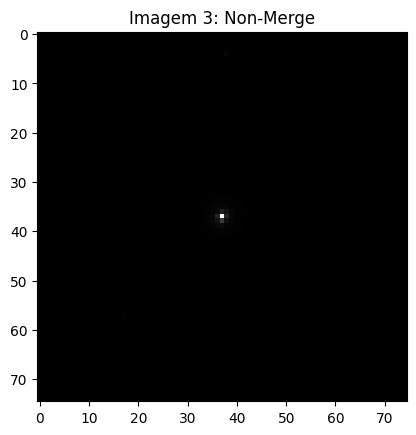

Shape da imagem 3: (75, 75)


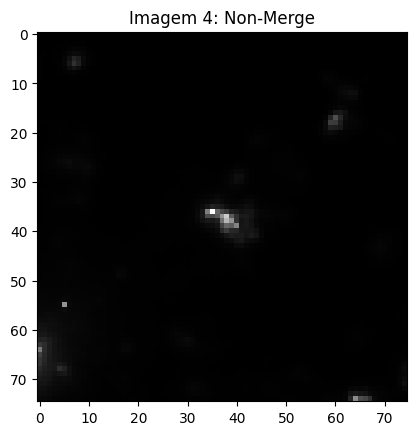

Shape da imagem 4: (75, 75)


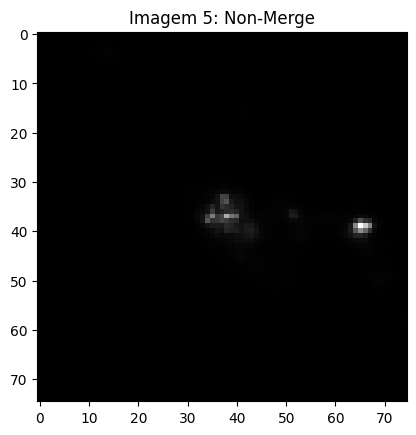

Shape da imagem 5: (75, 75)


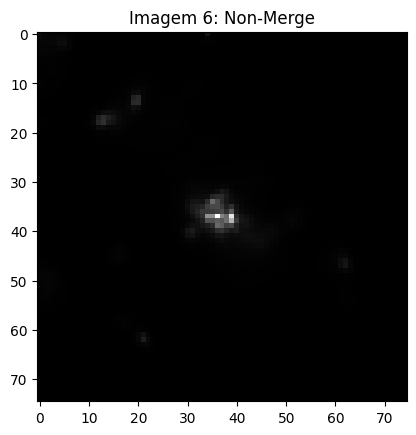

Shape da imagem 6: (75, 75)


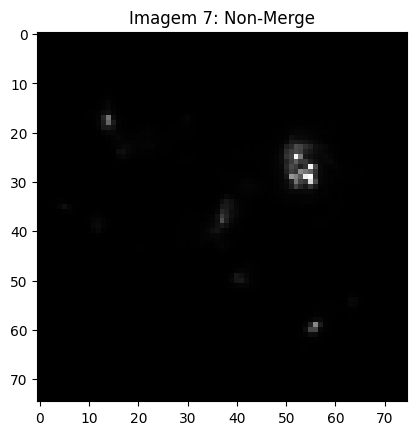

Shape da imagem 7: (75, 75)


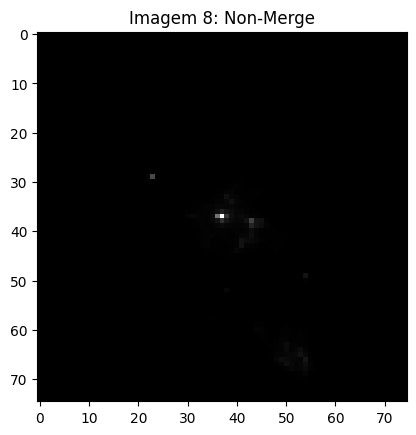

Shape da imagem 8: (75, 75)


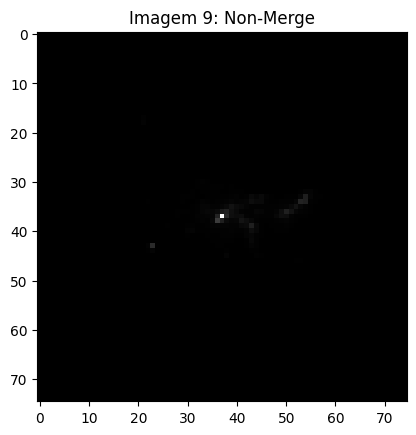

Shape da imagem 9: (75, 75)


In [1]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abre o arquivo FITS
hdulist = fits.open(file_fits)

# Extrai os dados dos HDUs
data_hdu0 = hdulist[0].data
data_hdu1 = hdulist[1].data

# Cria as listas de merge e non-merge
list_of_mergers = []
list_of_nonmergers = []

# Itera sobre os dados do HDU 1 e classifica as imagens
for i in range(len(data_hdu1)):
    if data_hdu1[i] == 1:
        list_of_mergers.append(i)
    else:
        list_of_nonmergers.append(i)

# Imprime as primeiras 10 imagens e suas classificações
for i in range(10):
    # Índice da imagem no HDU 0
    index_hdu0 = i

    # Extrai a imagem do HDU 0
    image = data_hdu0[index_hdu0, 0, :, :]

    # Classificação da imagem (merge ou non-merge)
    if index_hdu0 in list_of_mergers:
        classification = "Merge"
    else:
        classification = "Non-Merge"

    # Imprime a imagem e a classificação
    plt.imshow(image, cmap="gray")
    plt.title(f"Imagem {index_hdu0}: {classification}")
    plt.show()

    # Imprime o shape da imagem
    print(f"Shape da imagem {index_hdu0}: {image.shape}")

# Fecha o arquivo FITS
hdulist.close()

[ 2480 14419  8902 11863  9118 14018  6364  8688  1175  2221 10703 14222
   822 10961  2405  6755]
Comprimento da lista de mergers: 7306
Shape da lista de mergers: (7306,)
Comprimento da lista de non-mergers: 8120
Shape da lista de non-mergers: (8120,)


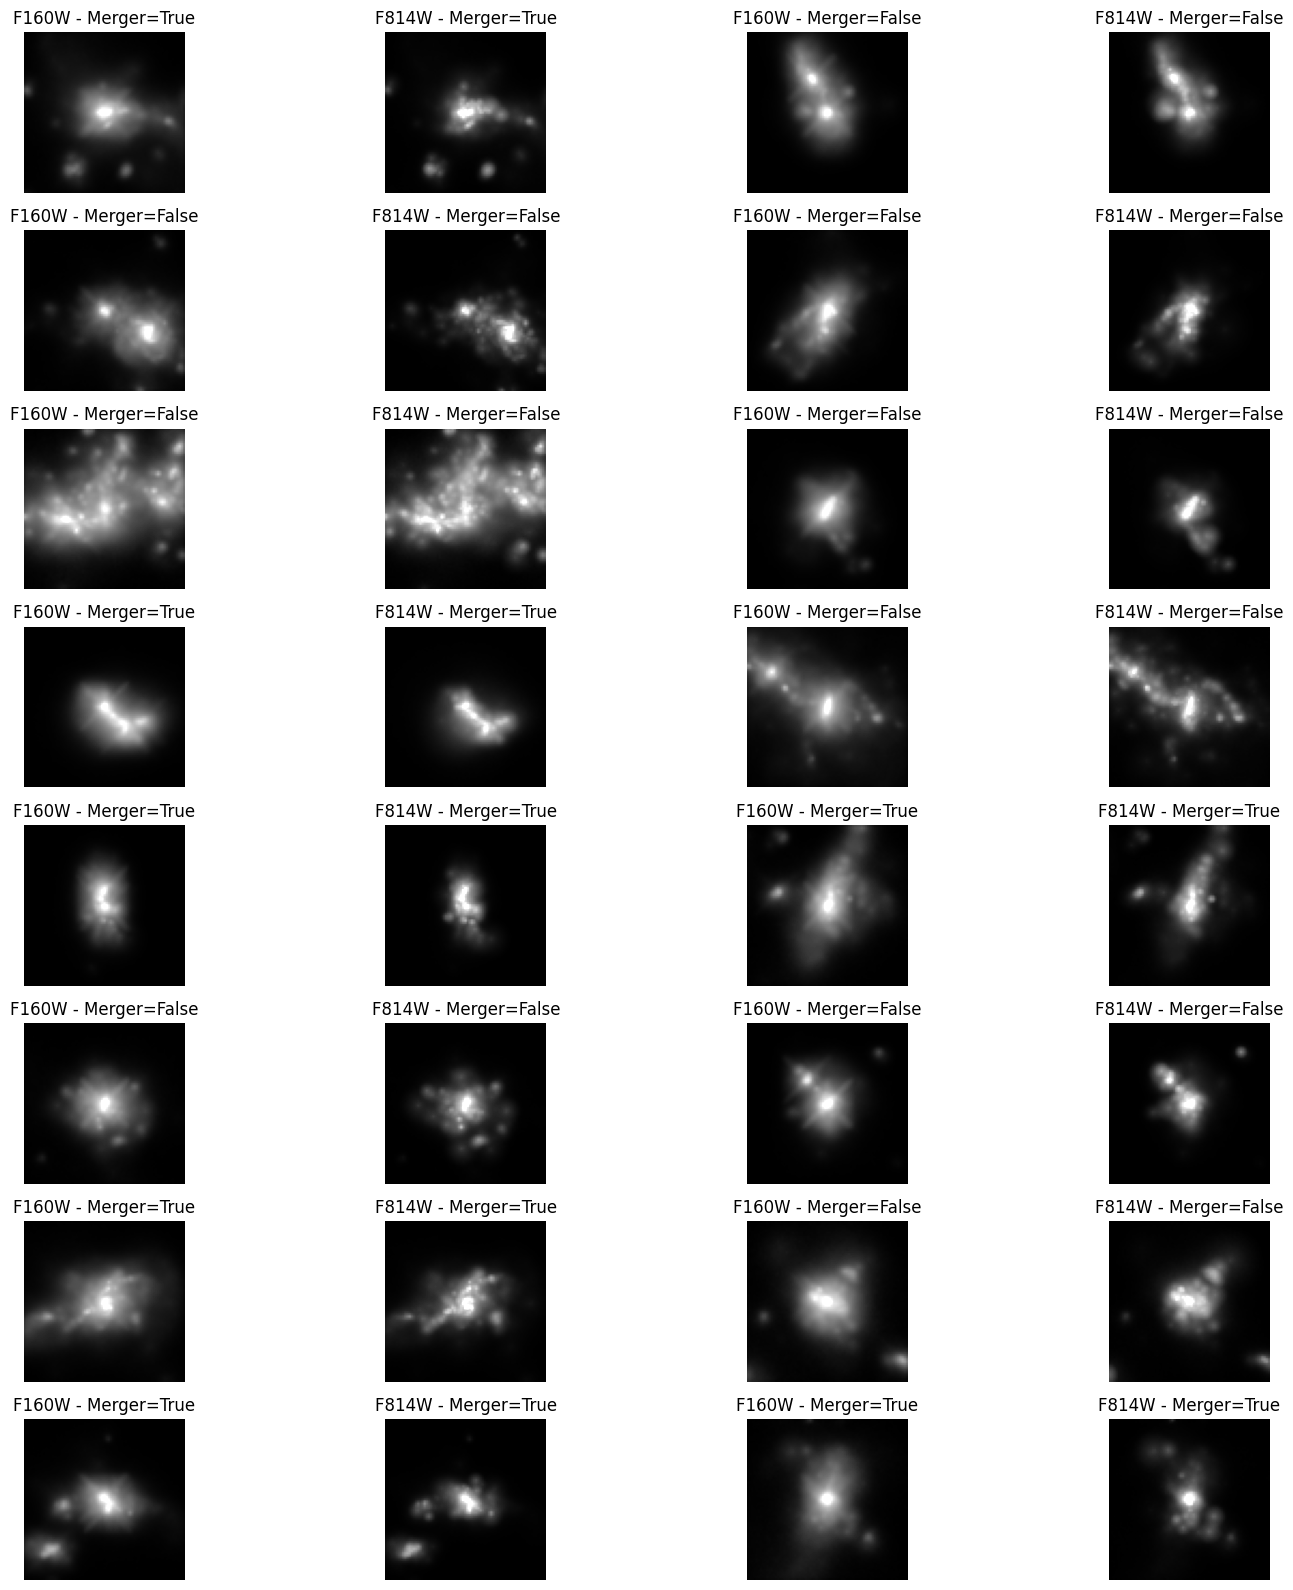

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm

# Caminho do arquivo FITS
file_fits = "C:\\Users\\stefa\\OneDrive\\Documentos\\NATALI TCC\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
# np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]

# Extrai os dados dos HDUs
data_hdu0 = hdulist[0].data
data_hdu1 = hdulist[1].data

# Cria as listas de merge e non-merge
list_of_mergers = []
list_of_nonmergers = []

# Itera sobre os dados do HDU 1 e classifica as imagens
for i in range(len(data_hdu1)):
    if data_hdu1[i][0] == 0:  # Acessa o elemento da tupla
        list_of_mergers.append(i)
    else:
        list_of_nonmergers.append(i)

# Imprime o comprimento e o shape das listas
print(f"Comprimento da lista de mergers: {len(list_of_mergers)}")
print(f"Shape da lista de mergers: {np.array(list_of_mergers).shape}")
print(f"Comprimento da lista de non-mergers: {len(list_of_nonmergers)}")
print(f"Shape da lista de non-mergers: {np.array(list_of_nonmergers).shape}")

# Inicializar a figura
fig = plt.figure(figsize=(16, 16))  # Ajuste a altura para separar as imagens

# Loop pelas imagens selecionadas aleatoriamente e plotar com rótulos
for i, (image_f160w, image_f814w) in enumerate(zip(examples_f160w, examples_f814w)):
    # F160W
    ax1 = fig.add_subplot(8, 4, i * 2 + 1)  # Ajuste o layout para 8 linhas e 4 colunas
    norm1 = simple_norm(image_f160w, 'log', max_percent=99.75)
    ax1.imshow(image_f160w, aspect='equal', cmap='binary_r', norm=norm1)
    ax1.set_title('F160W - Merger=' + str(bool(data_hdu1[example_ids[i]][0])))  # Corrigido
    ax1.axis('off')

    # F814W
    ax2 = fig.add_subplot(8, 4, i * 2 + 2)  # Ajuste o layout para 8 linhas e 4 colunas
    norm2 = simple_norm(image_f814w, 'log', max_percent=99.75)
    ax2.imshow(image_f814w, aspect='equal', cmap='binary_r', norm=norm2)
    ax2.set_title('F814W - Merger=' + str(bool(data_hdu1[example_ids[i]][0])))  # Corrigido
    ax2.axis('off')

plt.tight_layout()  # Ajuste o layout para evitar sobreposição dos títulos
plt.show()

hdulist.close()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import h5py

# Caminho do arquivo FITS
file_fits = "C:\\\\Users\\\\stefa\\\\OneDrive\\\\Documentos\\\\NATALI TCC\\\\hlsp_deepmerge_hst_acs-wfc3_illustris-z2_f814w-f160w_v1_sim-pristine.fits"

# Abrir o arquivo FITS
hdulist = fits.open(file_fits)

# Acessar o cabeçalho do primeiro HDU (hdu[0])
header = hdulist[0].header

# Definir a seed para garantir a mesma seleção de imagens
# np.random.seed(206265)  # descomente para obter sempre a mesma seleção

# Selecionar 16 imagens aleatórias
example_ids = np.random.choice(hdulist[1].data.shape[0], 16)
print(example_ids)

# Pegar as imagens F160W (índice=1) e F814W (índice=0) do conjunto de dados simulado para as seleções
examples_f160w = [hdulist[0].data[j, 1, :, :] for j in example_ids]
examples_f814w = [hdulist[0].data[j, 0, :, :] for j in example_ids]

# Extrai os dados dos HDUs
data_hdu0 = hdulist[0].data
data_hdu1 = hdulist[1].data

# Cria as listas de merge e non-merge
list_of_mergers = []
list_of_nonmergers = []

# Itera sobre os dados do HDU 1 e classifica as imagens
for i in range(len(data_hdu1)):
    if data_hdu1[i][0] == 0:  # Acessa o elemento da tupla
        list_of_mergers.append(i)
    else:
        list_of_nonmergers.append(i)

# Salva as listas em arquivos HDF5
with h5py.File("list_of_mergers.hdf5", "w") as f:
    f.create_dataset("mergers", data=np.array(list_of_mergers))

with h5py.File("list_of_nonmergers.hdf5", "w") as f:
    f.create_dataset("non_mergers", data=np.array(list_of_nonmergers))

# Imprime o comprimento e o shape das listas
print(f"Comprimento da lista de mergers: {len(list_of_mergers)}")
print(f"Shape da lista de mergers: {np.array(list_of_mergers).shape}")
print(f"Comprimento da lista de non-mergers: {len(list_of_nonmergers)}")
print(f"Shape da lista de non-mergers: {np.array(list_of_nonmergers).shape}")

# Imprime o shape e o comprimento dos arquivos HDF5
with h5py.File("list_of_mergers.hdf5", "r") as f:
    print(f"Shape do arquivo list_of_mergers.hdf5: {f['mergers'].shape}")
    print(f"Comprimento do arquivo list_of_mergers.hdf5: {len(f['mergers'])}")

with h5py.File("list_of_nonmergers.hdf5", "r") as f:
    print(f"Shape do arquivo list_of_nonmergers.hdf5: {f['non_mergers'].shape}")
    print(f"Comprimento do arquivo list_of_nonmergers.hdf5: {len(f['non_mergers'])}")

hdulist.close()

[ 8838   652  8939  4697  6183 14693  8143  2288  8795  9537  2584 15416
  3764  3849  1056   672]
Comprimento da lista de mergers: 7306
Shape da lista de mergers: (7306,)
Comprimento da lista de non-mergers: 8120
Shape da lista de non-mergers: (8120,)
Shape do arquivo list_of_mergers.hdf5: (7306,)
Comprimento do arquivo list_of_mergers.hdf5: 7306
Shape do arquivo list_of_nonmergers.hdf5: (8120,)
Comprimento do arquivo list_of_nonmergers.hdf5: 8120
